In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('mode.chained_assignment', None)

# Load Data

In [2]:
df=pd.read_csv('auctions.csv')
df.head()

,auctionId,asset_name,auction_description,auction_location,auction_start_date,auction_end_date,auction_start_time,auction_end_time,is_observere_end_auction,minimum_bid_price,...,auction_final_price,diff_estimated_auctual_price,sold_category,winner_name,winner_identity_number,auction_court,auction_city,biddings_count,bidders_count,tenant
0,1049,مبنى تجاري مساحة 6000م,بيع 80 بالمئة من العقار,NaN,2021-02-03,2021-02-07,9:00,17:00,0,500000,...,NaN,NaN,not_settled_less_than_estimated,NaN,NaN,محكمة التنفيذ بالرياض,الرياض,NaN,NaN,وزارة العدل
1,1058,فيلا بحي الصفراء ببريدة,فيلا بحي الصفراء ببريدة,NaN,2021-02-02,2021-02-13,8:00,20:00,0,30000,...,NaN,NaN,not_settled_less_than_estimated,NaN,NaN,ثقة لخدمات الاعمال,بريدة,NaN,NaN,خاصة
2,921,قطعة 1907 بمساحة 1115م بحي شرق الرياض,أرض سكنية,NaN,2021-01-30,2021-01-31,10:00,18:00,0,5000,...,NaN,NaN,not_settled_less_than_estimated,NaN,NaN,محكمة التنفيذ بالرياض,الرياض,NaN,NaN,وزارة العدل
3,924,قطعة 761 بمساحة 2000م بحي شرق الرياض,أرض سكنية,NaN,2021-01-26,2021-01-27,10:00,18:00,0,5000,...,NaN,NaN,not_settled_less_than_estimated,NaN,NaN,محكمة التنفيذ بالرياض,الرياض,NaN,NaN,وزارة العدل
4,1047,فيلا دوبليكس حي الخالدية,فيلا دبليكس,NaN,2021-01-26,2021-01-31,9:00,22:00,0,50000,...,NaN,NaN,not_settled_less_than_estimated,NaN,NaN,محكمة التنفيذ بمحافظة جدة,جدة,NaN,NaN,وزارة العدل


# Clean Data

In [3]:
df.describe()

,auctionId,is_observere_end_auction,minimum_bid_price,asset_area,solvency,start_bid_price,asset_estimated_price,auction_final_price,diff_estimated_auctual_price,winner_identity_number,biddings_count,bidders_count
count,1014.000000,1014.000000,1.014000e+03,1.002000e+03,1.014000e+03,1.014000e+03,1.014000e+03,8.650000e+02,5.280000e+02,5.120000e+02,727.000000,842.000000
mean,505.537475,0.001972,6.908407e+04,3.928659e+04,1.797906e+05,2.296717e+06,3.285841e+06,2.126634e+06,2.104000e+06,1.038875e+09,16.005502,14.646081
std,315.262419,0.044390,2.207775e+05,4.575295e+05,6.063792e+05,9.311283e+06,1.243245e+07,9.526781e+06,7.686227e+06,3.015930e+07,18.518250,21.848754
min,3.000000,0.000000,1.000000e+00,1.940000e+01,0.000000e+00,1.000000e+02,1.000000e+03,0.000000e+00,-7.235000e+06,1.000132e+09,1.000000,1.000000
25%,230.250000,0.000000,1.000000e+04,4.356250e+02,2.500000e+04,1.500000e+05,2.742500e+05,0.000000e+00,3.498350e+04,1.013773e+09,4.000000,4.000000
50%,489.500000,0.000000,1.500000e+04,7.321950e+02,5.000000e+04,5.000000e+05,7.500000e+05,2.850000e+05,1.397780e+05,1.031733e+09,11.000000,7.000000
75%,796.750000,0.000000,5.000000e+04,1.499250e+03,1.088615e+05,1.500000e+06,2.280625e+06,1.240000e+06,4.233938e+05,1.061941e+09,21.000000,14.000000
max,1058.000000,1.000000,5.000000e+06,1.262452e+07,1.200000e+07,1.800000e+08,2.348718e+08,2.060000e+08,9.618100e+07,1.189938e+09,138.000000,103.000000


In [4]:
#Check NULL values
df.isna().sum()

auctionId                         0
asset_name                        0
auction_description               0
auction_location                309
auction_start_date                0
auction_end_date                  0
auction_start_time                0
auction_end_time                  0
is_observere_end_auction          0
minimum_bid_price                 0
asset_location                   61
asset_area                       12
solvency                          0
start_bid_price                   0
start_time_auction_presence     309
auction_creation_time             0
auction_status                    0
auction_type                      0
asset_name.1                      0
asset_estimated_price             0
asset_creation_time               0
asset_type                        0
sales_agent                       0
auction_final_price             149
diff_estimated_auctual_price    486
sold_category                     0
winner_name                     502
winner_identity_number      

In [5]:
df.auction_status.unique()

array(['قادم', 'جاري', 'منتهي بالترسية', 'ملغي', 'منتهي لم يتم الترسية'],
      dtype=object)

In [6]:
df.auction_status.replace({'منتهي لم يتم الترسية':'not_settled','ملغي':'canceled','منتهي بالترسية':'settled',
                           'جاري':'inprogress','قادم':'comming'},inplace=True)

In [7]:
# check
df.auction_status.unique()

array(['comming', 'inprogress', 'settled', 'canceled', 'not_settled'],
      dtype=object)

In [8]:
df.columns

Index(['auctionId', 'asset_name', 'auction_description', 'auction_location',
       'auction_start_date', 'auction_end_date', 'auction_start_time',
       'auction_end_time', 'is_observere_end_auction', 'minimum_bid_price',
       'asset_location', 'asset_area', 'solvency', 'start_bid_price',
       'start_time_auction_presence', 'auction_creation_time',
       'auction_status', 'auction_type', 'asset_name.1',
       'asset_estimated_price', 'asset_creation_time', 'asset_type',
       'sales_agent', 'auction_final_price', 'diff_estimated_auctual_price',
       'sold_category', 'winner_name', 'winner_identity_number',
       'auction_court', 'auction_city', 'biddings_count', 'bidders_count',
       'tenant'],
      dtype='object')

In [9]:
df_filtered=df[['auctionId','auction_start_date','auction_end_date',
                                'biddings_count','bidders_count','asset_area','solvency','minimum_bid_price','start_bid_price',
                               'auction_type','asset_estimated_price','asset_type','auction_court','auction_city','tenant','auction_status']]
df_filtered.head()

,auctionId,auction_start_date,auction_end_date,biddings_count,bidders_count,asset_area,solvency,minimum_bid_price,start_bid_price,auction_type,asset_estimated_price,asset_type,auction_court,auction_city,tenant,auction_status
0,1049,2021-02-03,2021-02-07,NaN,NaN,6000.00,2000000,500000,25000000,إلكتروني غيابي,36256000.0,عقار,محكمة التنفيذ بالرياض,الرياض,وزارة العدل,comming
1,1058,2021-02-02,2021-02-13,NaN,NaN,4000.00,25000,30000,380000,إلكتروني غيابي,500000.0,عقار,ثقة لخدمات الاعمال,بريدة,خاصة,comming
2,921,2021-01-30,2021-01-31,NaN,NaN,1115.87,4000,5000,100000,إلكتروني غيابي,79000.0,عقار,محكمة التنفيذ بالرياض,الرياض,وزارة العدل,comming
3,924,2021-01-26,2021-01-27,NaN,NaN,2000.00,15000,5000,100000,إلكتروني غيابي,150250.0,عقار,محكمة التنفيذ بالرياض,الرياض,وزارة العدل,comming
4,1047,2021-01-26,2021-01-31,NaN,NaN,390.00,200000,50000,1900000,إلكتروني غيابي,2191378.0,عقار,محكمة التنفيذ بمحافظة جدة,جدة,وزارة العدل,comming


In [10]:
df_filtered.dtypes

auctionId                  int64
auction_start_date        object
auction_end_date          object
biddings_count           float64
bidders_count            float64
asset_area               float64
solvency                   int64
minimum_bid_price          int64
start_bid_price            int64
auction_type              object
asset_estimated_price    float64
asset_type                object
auction_court             object
auction_city              object
tenant                    object
auction_status            object
dtype: object

In [11]:
df_filtered['auction_start_date']=pd.to_datetime(df_filtered['auction_start_date'])
df_filtered['auction_end_date']=pd.to_datetime(df_filtered['auction_end_date'])

In [12]:
df_filtered.dtypes

auctionId                         int64
auction_start_date       datetime64[ns]
auction_end_date         datetime64[ns]
biddings_count                  float64
bidders_count                   float64
asset_area                      float64
solvency                          int64
minimum_bid_price                 int64
start_bid_price                   int64
auction_type                     object
asset_estimated_price           float64
asset_type                       object
auction_court                    object
auction_city                     object
tenant                           object
auction_status                   object
dtype: object

In [13]:
df_filtered['year']=df_filtered.auction_start_date.dt.year
df_filtered['month']=df_filtered.auction_start_date.dt.month
df_filtered['day']=df_filtered.auction_start_date.dt.day
df_filtered['weekday']=df_filtered.auction_start_date.dt.weekday
df_filtered['auction_period']=(df_filtered['auction_end_date']-df_filtered['auction_start_date']).dt.days

df_filtered.tail(3)

,auctionId,auction_start_date,auction_end_date,biddings_count,bidders_count,asset_area,solvency,minimum_bid_price,start_bid_price,auction_type,...,asset_type,auction_court,auction_city,tenant,auction_status,year,month,day,weekday,auction_period
1011,4,2019-12-15,2019-12-16,27.0,5.0,161.71,84089,5000,200000,إلكتروني حضوري,...,عقار,محكمة التنفيذ بالمدينة المنورة,NaN,وزارة العدل,settled,2019,12,15,6,1
1012,5,2019-12-15,2019-12-16,29.0,6.0,82.95,41973,5000,150000,إلكتروني حضوري,...,عقار,محكمة التنفيذ بالمدينة المنورة,NaN,وزارة العدل,settled,2019,12,15,6,1
1013,3,2019-12-14,2019-12-15,7.0,3.0,414.45,30000,1000,50000,إلكتروني حضوري,...,عقار,محكمة التنفيذ بالمدينة المنورة,NaN,وزارة العدل,settled,2019,12,14,5,1


In [14]:
# check asset type
df_filtered.asset_type.value_counts()

عقار        1012
مصنع           2
Name: asset_type, dtype: int64

In [15]:
#remove asset_type
df_filtered.drop('asset_type',axis=1,inplace=True)

In [16]:
# auction type
df_filtered.auction_type.value_counts()

إلكتروني حضوري     702
إلكتروني غيابي     312
Name: auction_type, dtype: int64

In [17]:
df_filtered.auction_type[0:1].values[0]

'إلكتروني غيابي'

In [18]:
df_filtered.auction_type.replace({'إلكتروني حضوري ':'online_attendance','إلكتروني غيابي':'absentee_auction'},inplace=True)
# auction type
df_filtered.auction_type.value_counts()

online_attendance    702
absentee_auction     312
Name: auction_type, dtype: int64

In [19]:
df_filtered.auction_type.replace({'online_attendance':'1','absentee_auction':'0'},inplace=True)
# auction type
df_filtered.auction_type.value_counts()

1    702
0    312
Name: auction_type, dtype: int64

In [20]:
df_filtered[['biddings_count','bidders_count','year','month','day','weekday','auction_period','auction_type']].corr()

,biddings_count,bidders_count,year,month,day,weekday,auction_period
biddings_count,1.000000,0.117987,-0.087407,0.052445,0.063918,-0.018453,-0.173282
bidders_count,0.117987,1.000000,-0.078078,0.030272,-0.212052,0.252415,-0.166516
year,-0.087407,-0.078078,1.000000,-0.882137,-0.102987,-0.033890,0.140905
month,0.052445,0.030272,-0.882137,1.000000,0.092452,0.083160,0.001596
day,0.063918,-0.212052,-0.102987,0.092452,1.000000,-0.069368,0.046590
weekday,-0.018453,0.252415,-0.033890,0.083160,-0.069368,1.000000,-0.104724
auction_period,-0.173282,-0.166516,0.140905,0.001596,0.046590,-0.104724,1.000000


In [21]:
## What is the effectivness of  month day over auctions
df_filtered.groupby(['day'])['auctionId'].count().reset_index(name="count").set_index('day')\
.sort_values(by='count',ascending=False)

,count
day,
10,102
24,88
16,79
20,49
13,47
19,39
15,35
12,34
14,34


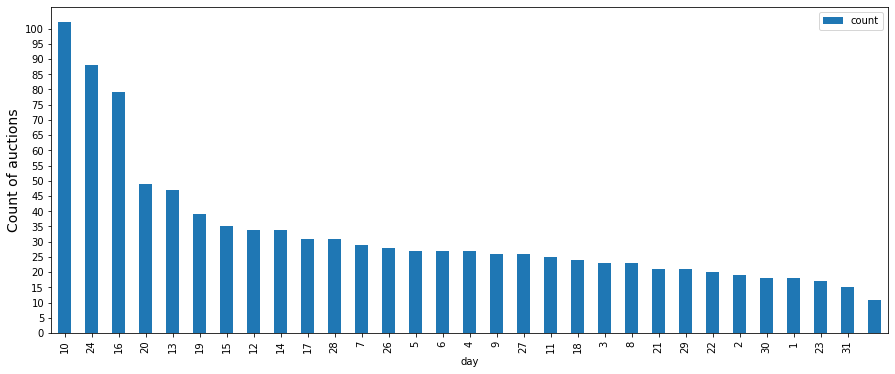

In [22]:

df_filtered.groupby(['day'])['auctionId'].count().reset_index(name="count").set_index('day')\
.sort_values(by='count',ascending=False).plot(kind='bar',figsize=(15,6))
plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0, 105, 5))
plt.ylabel('Count of auctions',fontsize=14);

plt.show()

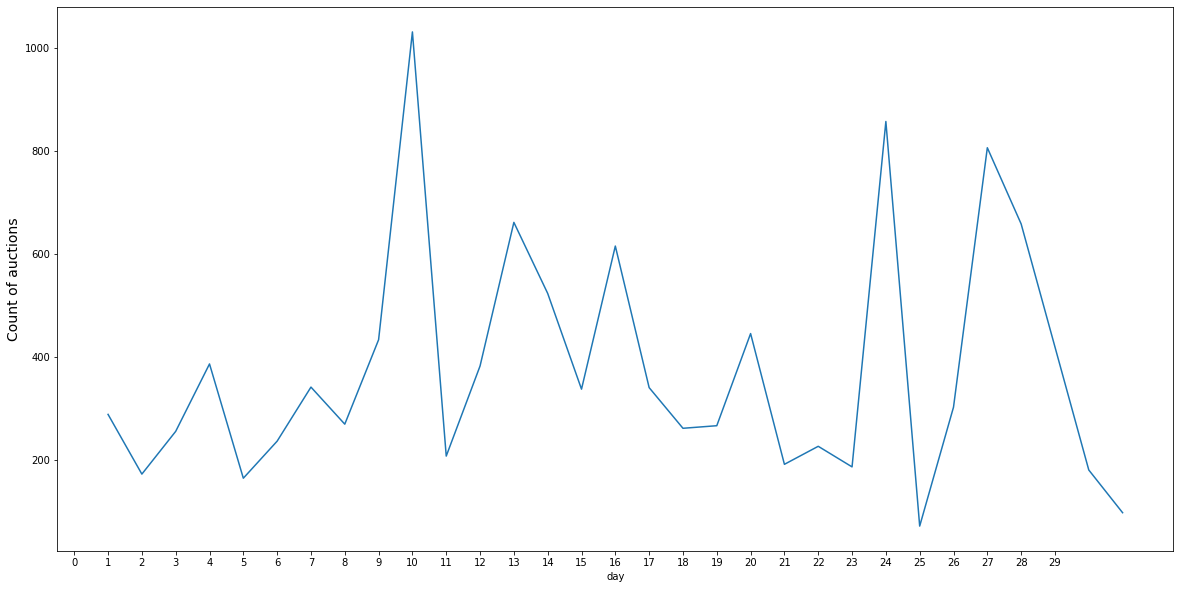

In [23]:
# biddings over month days
plt.figure(figsize=(20,10))
df_filtered.groupby(['day'])['biddings_count'].sum().plot()
plt.xticks(np.arange(0, 30, 1))
plt.ylabel('Count of auctions',fontsize=14);

In [28]:
df_filtered[(df_filtered.auction_status=='settled')].shape

(489, 20)

In [29]:
df_settled=df_filtered[(df_filtered.auction_status=='settled')]
df_settled.head()

,auctionId,auction_start_date,auction_end_date,biddings_count,bidders_count,asset_area,solvency,minimum_bid_price,start_bid_price,auction_type,asset_estimated_price,auction_court,auction_city,tenant,auction_status,year,month,day,weekday,auction_period
36,1040,2021-01-19,2021-01-20,15.0,14.0,1500.0,35000,5000,200000,1,180000.0,دائرة الحجز والتنفيذ بالمحكمة العامة بالنعيرية,النعيرية,وزارة العدل,settled,2021,1,19,1,1
38,1026,2021-01-18,2021-01-20,4.0,7.0,69405.0,50000,10000,200000,1,200637.0,المحكمة العامة بمحافظة شقراء,شقراء,وزارة العدل,settled,2021,1,18,0,2
39,1027,2021-01-18,2021-01-20,42.0,10.0,810090.0,50000,10000,700000,1,702389.0,المحكمة العامة بمحافظة شقراء,شقراء,وزارة العدل,settled,2021,1,18,0,2
40,1029,2021-01-18,2021-01-21,5.0,4.0,400.0,35071,5000,500000,1,701424.0,محكمة التنفيذ بالدمام,الدمام,وزارة العدل,settled,2021,1,18,0,3
44,1024,2021-01-17,2021-01-18,5.0,2.0,120.0,11000,2000,110000,0,110000.0,محكمة التنفيذ بالرياض,الرياض,وزارة العدل,settled,2021,1,17,6,1


### predict bidders Count over time series

### Predict bidders count according to features